In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("05-Customers.csv")
df.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [4]:
#inja dige kollan 2 ta sotun hast ke joftesho mikhaym
x = df.iloc[:,0:2].values

# Inja dige dade haro be test och train tabdil nemikonim inja mikhaim clustring konim yaeni chizi be chizi tabdil nemishe pas bara in dg train_test_split nemikhad

# va inke dg faghat x darim x_test ina nadarim

In [4]:
# from sklearn.model_selection import train_test_split
# # x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y,random_state=40)
# #chon dige klassifering nis o numerical hast dige stratify nemikhad
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)



In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

be in asooni nis bedunim k ro chand begirim. elme gheyb nadarim<br> hala chejuri befahmim chi khube? ba raveshe elbow<br>

In [30]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5,init="k-means++")
model.fit(x)
print(model.inertia_)


65.56840815571681


# Evaluate =====

hala beram bbeinam har moshtari ro tuye kodum khushe cluster endakhte

In [24]:
y_pred = model.predict(x)
print(y_pred)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


Har seri ke ejra konam khorujish fargh mikone!!!!

Yaeni dar asl fargh nemikone. Ye bar be yeki gofte 1 ye bar behesh gofte 2 yaeni esmesh fargh karde ama KHOSHE hamone. cluster hamoone hala esme khushe harchi bashe asalan bege mamad ya naghi ya taghi

In [10]:
# from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score


In [31]:
# mae = mean_absolute_error(y_test,y_pred)
# print(f"MAE: {mae}")
# mse = mean_squared_error(y_test,y_pred)
# print(f"MSE: {mse}")
# #rmse
# print(f"RMSE: {np.sqrt(mse)}")
# mape = mean_absolute_percentage_error(y_test,y_pred)
# print(f"MAPE: {mape}")
# r2 = r2_score(y_test,y_pred)
# print(f"r2: {r2}")

# ===== Visualisation ======

chon sotune y nadarim evaluation kami sakhte

In [32]:
from sklearn.metrics import silhouette_score
silouhete = silhouette_score(x,y_pred)
print(silouhete)

0.46098969139248164


In [33]:
from sklearn.decomposition import PCA

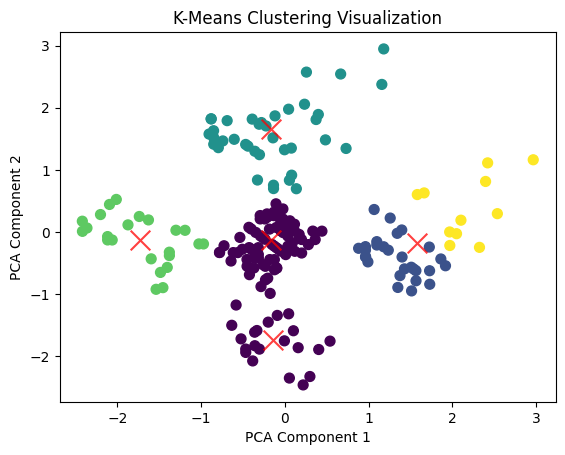

In [39]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

# Plotting
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, s=50, cmap='viridis')
centers = pca.transform(model.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization')
plt.show()